In [1]:
import numpy as np
rng = np.random.default_rng(0)
n, p = 200, 20
X = rng.standard_normal((n, p))
Y = rng.choice(['A','B'], size=n)

In [2]:
from glmnet import LogNet
nlambda=200
L = LogNet(nlambda=nlambda)
L.fit(X, Y)


LogNet(lambda_values=None, lambda_fractional=True, alpha=1.0, lower_limits=array([-9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35,
       -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35,
       -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35,
       -9.9e+35, -9.9e+35]), upper_limits=array([9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35,
       9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35,
       9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35]), penalty_factor=array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]]), fit_intercept=True, standardize=True, family=GLMFamilySpec(base=<statsmodels.genmod.families.family.Gaussian object at 0x1078b6b90>), control=GLMNetControl(thresh=1e-07, maxit=100000, big=9.9e+35, logging=False, mxitnr=25, epsnr=1e-06, fdev=1e-05), regularized_estimator=<class 'glmnet.paths.regularized_glm.RegGLM'>, lambda_min_ratio=0.0001, nlambda=200, df_max=21, univariate_beta=True, type_logistic='Newton')

In [3]:
import rpy2
%load_ext rpy2.ipython
%R -i X,Y,nlambda

In [4]:
X[0]

array([ 0.12573022, -0.13210486,  0.64042265,  0.10490012, -0.53566937,
        0.36159505,  1.30400005,  0.94708096, -0.70373524, -1.26542147,
       -0.62327446,  0.04132598, -2.32503077, -0.21879166, -1.24591095,
       -0.73226735, -0.54425898, -0.31630016,  0.41163054,  1.04251337])


Call:  glmnet(x = X, y = y, family = "binomial", nlambda = nlambda) 

   Df %Dev   Lambda
1   0 0.00 0.068820
2   1 0.12 0.065710
3   1 0.23 0.062740
4   1 0.33 0.059900
5   1 0.42 0.057190
6   4 0.58 0.054600
7   4 0.88 0.052130
8   4 1.14 0.049780
9   5 1.43 0.047530
10  6 1.75 0.045380
11  6 2.04 0.043320
12  6 2.31 0.041360
13  7 2.57 0.039490
14  7 2.82 0.037710
15  7 3.05 0.036000
16  8 3.30 0.034370
17  8 3.53 0.032820
18  8 3.75 0.031330
19  8 3.94 0.029920
20  8 4.12 0.028560
21  9 4.30 0.027270
22  9 4.46 0.026040
23  9 4.61 0.024860
24  9 4.74 0.023740
25  9 4.87 0.022660
26 10 4.98 0.021640
27 10 5.11 0.020660
28 11 5.24 0.019730
29 11 5.35 0.018830
30 12 5.47 0.017980
31 12 5.59 0.017170
32 12 5.69 0.016390
33 12 5.78 0.015650
34 12 5.87 0.014940
35 12 5.95 0.014270
36 12 6.03 0.013620
37 13 6.10 0.013010
38 13 6.17 0.012420
39 14 6.24 0.011860
40 14 6.31 0.011320
41 14 6.37 0.010810
42 15 6.43 0.010320
43 15 6.48 0.009852
44 15 6.53 0.009406
45 15 6.57 0.008981
46 15 6.6

Loading required package: Matrix
Loaded glmnet 4.1-8


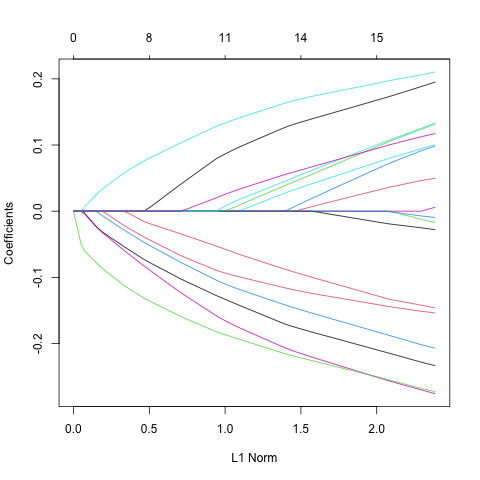

In [5]:
%%R
library(glmnet)
y = as.integer(Y=='A')
G = glmnet(X, y, family='binomial', nlam=nlambda)
plot(G)
G

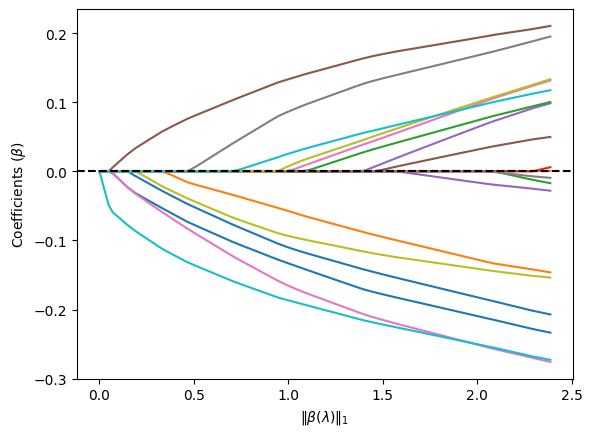

In [6]:
ax = L.plot_coefficients(xvar='norm')

In [7]:
L.summary_

,Degrees of Freedom,Fraction Deviance Explained
lambda,,
9.900000e+35,0,2.883916e-15
6.570998e-02,1,1.209180e-03
6.273802e-02,1,2.311689e-03
5.990048e-02,1,3.317119e-03
5.719128e-02,1,4.234162e-03
...,...,...
1.410229e-03,18,7.041396e-02
1.346447e-03,18,7.042461e-02
1.285549e-03,18,7.043629e-02


In [8]:
%%R -o C_R,I_R
C_R = as.matrix(coef(G))[-1,]
I_R = as.matrix(coef(G))[1,]

In [9]:
np.linalg.norm(C_R.T - L.coefs_) / np.linalg.norm(L.coefs_)

4.485804603228764e-16

In [10]:
np.linalg.norm(I_R - L.intercepts_) / np.linalg.norm(L.intercepts_)

6.50055820155781e-16

In [11]:
L.coefs_.shape

(89, 20)